### Environment setup

Preparation of the environment, including matplotlib display and saving features.

Libraries used:
- pip install numpy
- pip install pandas
- pip install sklearn

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy.random import default_rng

# Setup default RNG
random=default_rng(69) 

# Setup matplotlib
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Setup figures saving directory
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

# Function to save a figure as image file
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Data importation

We download the database.

In [2]:
import os
import tarfile
from six.moves import urllib

# Data directory
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/RubisetCie/Project-Artificial-Intelligence/main/Data/"
DESTINATION_PATH = "datasets"
SOURCE_NAME = "general_data.csv"

# Function to fetch data
def fetch_data(url=DOWNLOAD_ROOT, filename=SOURCE_NAME, destination=DESTINATION_PATH):
    if not os.path.isdir(destination):
        os.makedirs(destination)
    csv_path = os.path.join(destination, filename)
    urllib.request.urlretrieve(url+filename, csv_path)

In [3]:
# Importation of the data
fetch_data(filename="general_data.csv")
fetch_data(filename="manager_survey_data.csv")
fetch_data(filename="employee_survey_data.csv")
fetch_data(filename="in_time.csv")
fetch_data(filename="out_time.csv")

### Data loading

We load the data into the memory, in order to review it and to apply some tweakings on the set.

In [4]:
import pandas as pd

# Function to load up data
def load_data(source=DESTINATION_PATH, filename=SOURCE_NAME):
    csv_path = os.path.join(source, filename)
    return pd.read_csv(csv_path)

In [10]:
employee_data = load_data(filename="employee_survey_data.csv")

Now we can review the loaded data.

In [11]:
employee_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [7]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [8]:
employee_data.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4385.000000,4390.000000,4372.000000
mean,2205.500000,2.723603,2.728246,2.761436
std,1273.201673,1.092756,1.101253,0.706245
min,1.000000,1.000000,1.000000,1.000000
25%,1103.250000,2.000000,2.000000,2.000000
50%,2205.500000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000


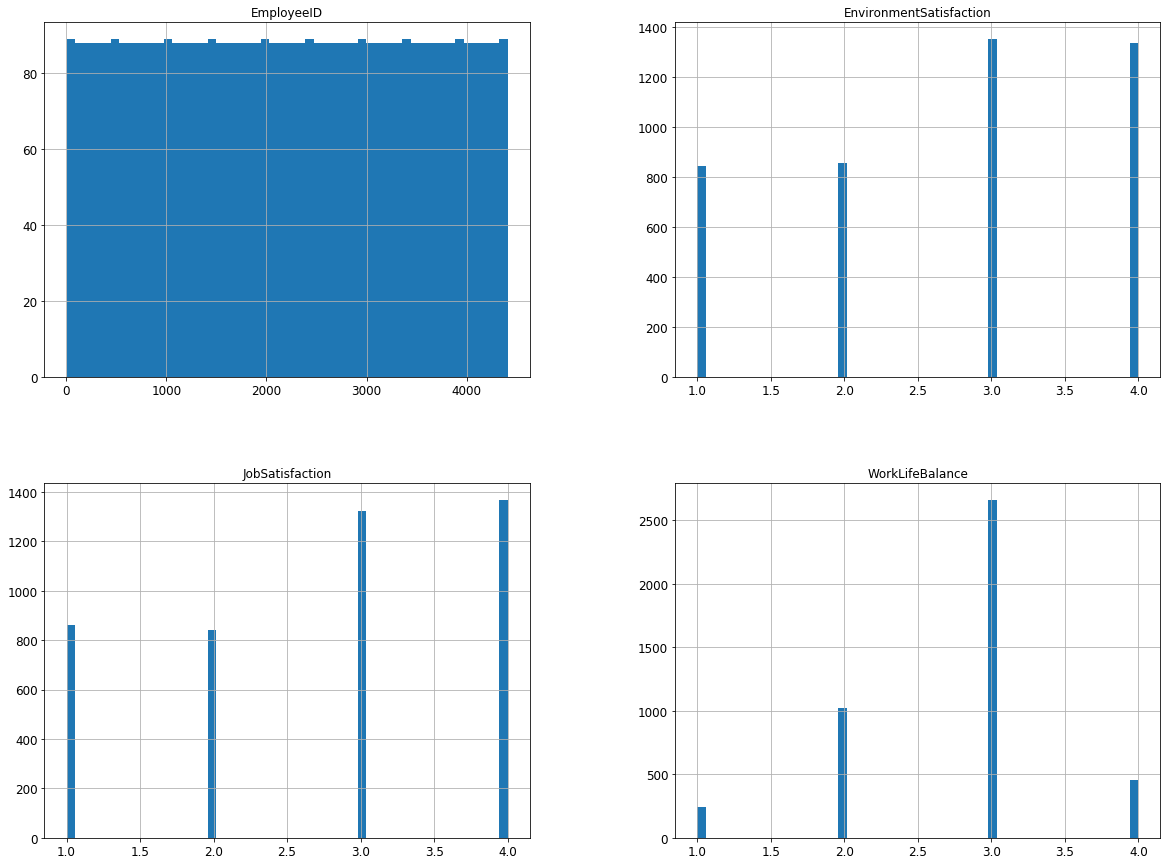

In [9]:
employee_data.hist(bins=50, figsize=(20,15))
plt.show()